<a href="https://colab.research.google.com/github/Radityofajar/Final-Project-DS40/blob/main/Discovrio_project_akhir.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Import Dataset**

In [ ]:
import gdown
import pandas as pd
import numpy as np

import math

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from scipy.stats import norm
from scipy import stats

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split

import pickle

import warnings
warnings.filterwarnings('ignore')

In [ ]:
!gdown 1XbC3fjc99S9n4Sdg_t7FOa4qwi0zBPlH

Downloading...
From: https://drive.google.com/uc?id=1XbC3fjc99S9n4Sdg_t7FOa4qwi0zBPlH
To: /content/song_data.csv
100% 2.22M/2.22M [00:00<00:00, 21.0MB/s]


In [ ]:
data = pd.read_csv('/content/song_data.csv')

In [ ]:
data

,song_name,song_popularity,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence
0,Boulevard of Broken Dreams,73,262333,0.005520,0.496,0.682,0.000029,8,0.0589,-4.095,1,0.0294,167.060,4,0.474
1,In The End,66,216933,0.010300,0.542,0.853,0.000000,3,0.1080,-6.407,0,0.0498,105.256,4,0.370
2,Seven Nation Army,76,231733,0.008170,0.737,0.463,0.447000,0,0.2550,-7.828,1,0.0792,123.881,4,0.324
3,By The Way,74,216933,0.026400,0.451,0.970,0.003550,0,0.1020,-4.938,1,0.1070,122.444,4,0.198
4,How You Remind Me,56,223826,0.000954,0.447,0.766,0.000000,10,0.1130,-5.065,1,0.0313,172.011,4,0.574
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18830,Let It Breathe,60,159645,0.893000,0.500,0.151,0.000065,11,0.1110,-16.107,1,0.0348,113.969,4,0.300
18831,Answers,60,205666,0.765000,0.495,0.161,0.000001,11,0.1050,-14.078,0,0.0301,94.286,4,0.265
18832,Sudden Love (Acoustic),23,182211,0.847000,0.719,0.325,0.000000,0,0.1250,-12.222,1,0.0355,130.534,4,0.286
18833,Gentle on My Mind,55,352280,0.945000,0.488,0.326,0.015700,3,0.1190,-12.020,1,0.0328,106.063,4,0.323


# **1. EDA**

## **Data Understanding**

**Deskripsi Data**

Data ini berisi lagu-lagu dan tingkat popularitasnya yang diukur berdasarkan beberapa faktor seperti energy, acoustics, instumentalness, liveness, dancibility, dan lainnya. Data ini terdiri dari 18835 records dan 15 kolom.

**Sumber Data**
Data didapatkan dari kaggle https://www.kaggle.com/datasets/yasserh/song-popularity-dataset/data

**Tampilan Data**

In [ ]:
data.head()

,song_name,song_popularity,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence
0,Boulevard of Broken Dreams,73,262333,0.005520,0.496,0.682,0.000029,8,0.0589,-4.095,1,0.0294,167.060,4,0.474
1,In The End,66,216933,0.010300,0.542,0.853,0.000000,3,0.1080,-6.407,0,0.0498,105.256,4,0.370
2,Seven Nation Army,76,231733,0.008170,0.737,0.463,0.447000,0,0.2550,-7.828,1,0.0792,123.881,4,0.324
3,By The Way,74,216933,0.026400,0.451,0.970,0.003550,0,0.1020,-4.938,1,0.1070,122.444,4,0.198
4,How You Remind Me,56,223826,0.000954,0.447,0.766,0.000000,10,0.1130,-5.065,1,0.0313,172.011,4,0.574


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18835 entries, 0 to 18834
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   song_name         18835 non-null  object 
 1   song_popularity   18835 non-null  int64  
 2   song_duration_ms  18835 non-null  int64  
 3   acousticness      18835 non-null  float64
 4   danceability      18835 non-null  float64
 5   energy            18835 non-null  float64
 6   instrumentalness  18835 non-null  float64
 7   key               18835 non-null  int64  
 8   liveness          18835 non-null  float64
 9   loudness          18835 non-null  float64
 10  audio_mode        18835 non-null  int64  
 11  speechiness       18835 non-null  float64
 12  tempo             18835 non-null  float64
 13  time_signature    18835 non-null  int64  
 14  audio_valence     18835 non-null  float64
dtypes: float64(9), int64(5), object(1)
memory usage: 2.2+ MB


**Statistik Deskriptif**

In [ ]:
data.describe()

,song_popularity,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence
count,18835.000000,1.883500e+04,18835.000000,18835.000000,18835.000000,18835.000000,18835.000000,18835.000000,18835.000000,18835.000000,18835.000000,18835.000000,18835.000000,18835.000000
mean,52.991877,2.182116e+05,0.258539,0.633348,0.644995,0.078008,5.289196,0.179650,-7.447435,0.628139,0.102099,121.073154,3.959119,0.527967
std,21.905654,5.988754e+04,0.288719,0.156723,0.214101,0.221591,3.614595,0.143984,3.827831,0.483314,0.104378,28.714456,0.298533,0.244632
min,0.000000,1.200000e+04,0.000001,0.000000,0.001070,0.000000,0.000000,0.010900,-38.768000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,40.000000,1.843395e+05,0.024100,0.533000,0.510000,0.000000,2.000000,0.092900,-9.044000,0.000000,0.037800,98.368000,4.000000,0.335000
50%,56.000000,2.113060e+05,0.132000,0.645000,0.674000,0.000011,5.000000,0.122000,-6.555000,1.000000,0.055500,120.013000,4.000000,0.527000
75%,69.000000,2.428440e+05,0.424000,0.748000,0.815000,0.002570,8.000000,0.221000,-4.908000,1.000000,0.119000,139.931000,4.000000,0.725000
max,100.000000,1.799346e+06,0.996000,0.987000,0.999000,0.997000,11.000000,0.986000,1.585000,1.000000,0.941000,242.318000,5.000000,0.984000


Tidak ada keanehan yang terlihat pada statistika deskriptif data ini

## **Distribusi Data**


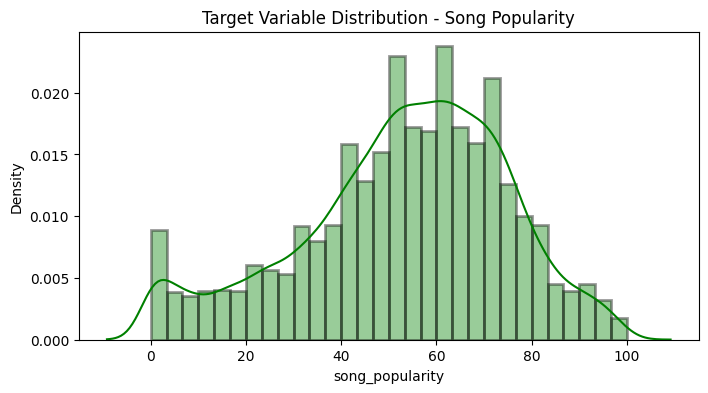

In [ ]:
#distribution of the target variable

plt.figure(figsize=[8,4])
sns.distplot(data['song_popularity'], color='g',hist_kws=dict(edgecolor="black", linewidth=2), bins=30)
plt.title('Target Variable Distribution - Song Popularity')
plt.show()

Distribusi dari kolom song_popularity cukup normal. Ini mengindikasikan bahwa cocok untuk dilakukan regresi pada data

                                 Numeric Features Distribution                                  


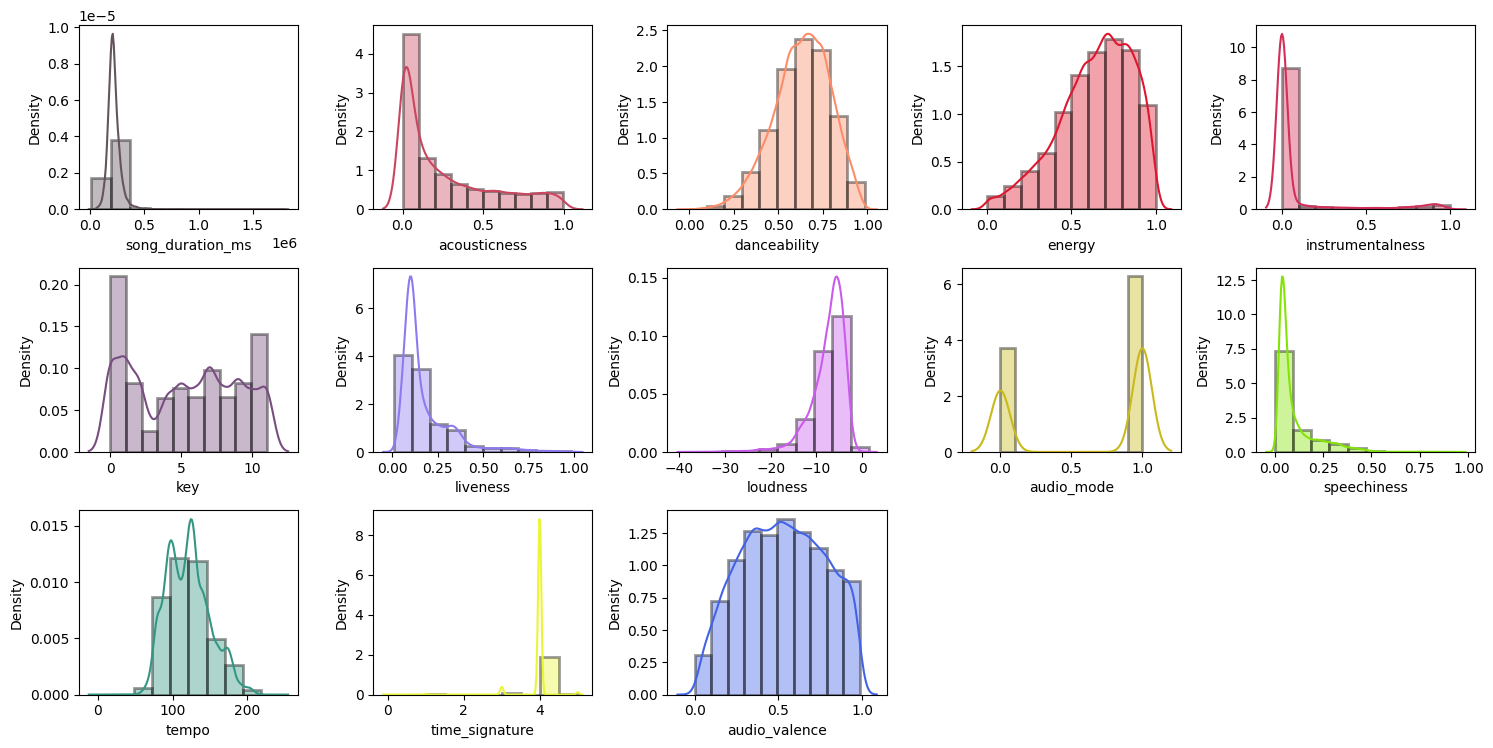

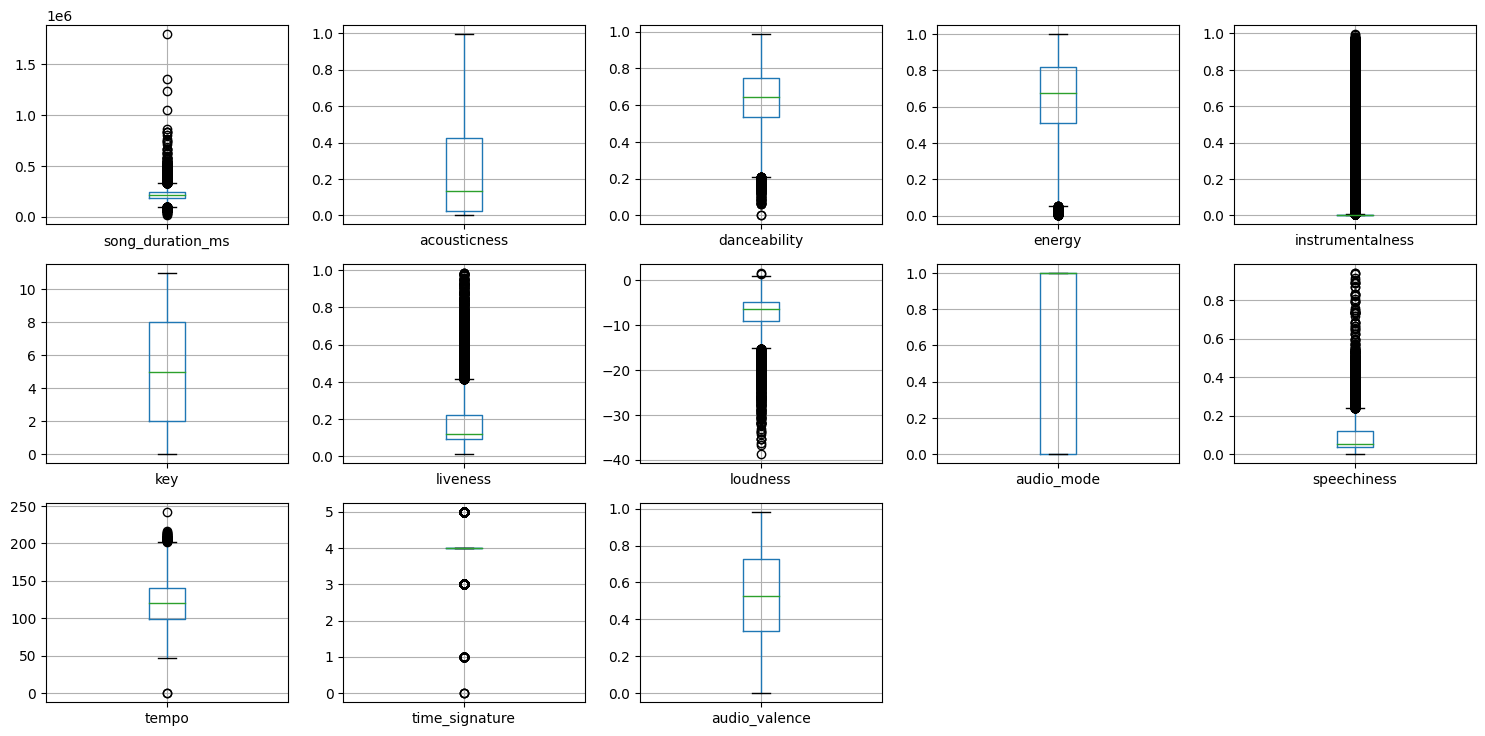

In [ ]:
#Visualising the numeric features
nf = ['song_duration_ms', 'acousticness',
       'danceability', 'energy', 'instrumentalness', 'key', 'liveness',
       'loudness', 'audio_mode', 'speechiness', 'tempo', 'time_signature',
       'audio_valence']
print('\033[1mNumeric Features Distribution'.center(100))

n=5

clr=['r','g','b','g','b','r']

plt.figure(figsize=[15,4*math.ceil(len(nf)/n)])
for i in range(len(nf)):
    plt.subplot(math.ceil(len(nf)/3),n,i+1)
    sns.distplot(data[nf[i]],hist_kws=dict(edgecolor="black", linewidth=2), bins=10, color=list(np.random.randint([255,255,255])/255))
plt.tight_layout()
plt.show()

plt.figure(figsize=[15,4*math.ceil(len(nf)/n)])
for i in range(len(nf)):
    plt.subplot(math.ceil(len(nf)/3),n,i+1)
    data.boxplot(nf[i])
plt.tight_layout()
plt.show()

- Terlihat adanya outlier pada beberapa kolom seperti song duration, dancability, energy, tempo, dan lainnya. Ini akan diperbaiki pada bagian data pre-processing

- Pada beberapa kolom, seperti 'key', 'audio_mode', dan 'time_signature', seharusnya adalah data kategorik karena variasi nilai unique yang sedikit. Ini akan diperbaiki pada bagian data pre-processing

- Untuk instrumentalness, data terlalu *skewed* ke kiri

## **Kualitas Data**

In [ ]:
# Missing Values
data.isnull().sum()

,0
song_name,0
song_popularity,0
song_duration_ms,0
acousticness,0
danceability,0
energy,0
instrumentalness,0
key,0
liveness,0
loudness,0


Data sudah cukup lengkap karena tidak ada missing values di setiap records

In [ ]:
dup_data = data[(data.duplicated())]
dup_data

,song_name,song_popularity,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence
173,Sex on Fire,81,203346,0.00172,0.542,0.905,0.010400,9,0.1360,-5.653,1,0.0540,153.398,4,0.374
179,Use Somebody,79,230760,0.00552,0.276,0.715,0.000417,0,0.2010,-5.356,1,0.0432,137.028,4,0.173
212,Hips Don't Lie,84,218093,0.28400,0.778,0.824,0.000000,10,0.4050,-5.892,0,0.0712,100.024,4,0.756
414,Hotel California - Remastered,83,391376,0.00574,0.579,0.508,0.000494,2,0.0575,-9.484,1,0.0270,147.125,4,0.609
421,Me and Bobby McGee,69,271333,0.30200,0.453,0.464,0.000060,2,0.1520,-10.960,1,0.0431,93.190,4,0.658
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18797,The Time I've Wasted,63,213249,0.79600,0.473,0.250,0.000088,5,0.1010,-11.263,1,0.0304,145.027,4,0.261
18811,Oceans,69,216186,0.27400,0.404,0.480,0.000009,9,0.1320,-8.906,0,0.0303,129.162,3,0.200
18817,Life Is Confusing,64,171413,0.95500,0.373,0.216,0.001050,1,0.0739,-11.410,1,0.0326,129.030,4,0.496
18826,Call It Dreaming,67,231760,0.61000,0.519,0.515,0.000057,5,0.1070,-9.448,1,0.0310,80.329,4,0.714


Dari 18835 records yang ada, 3909nya terduplikat satu sama lain. Hal ini akan diperbaiki pada tahap pre-processing

## **Hubungan Antarvariabel**

**Selain Variabel Target**

In [ ]:
X = data.drop(['song_name','song_popularity'],axis=1)  #axis=1 is by columns

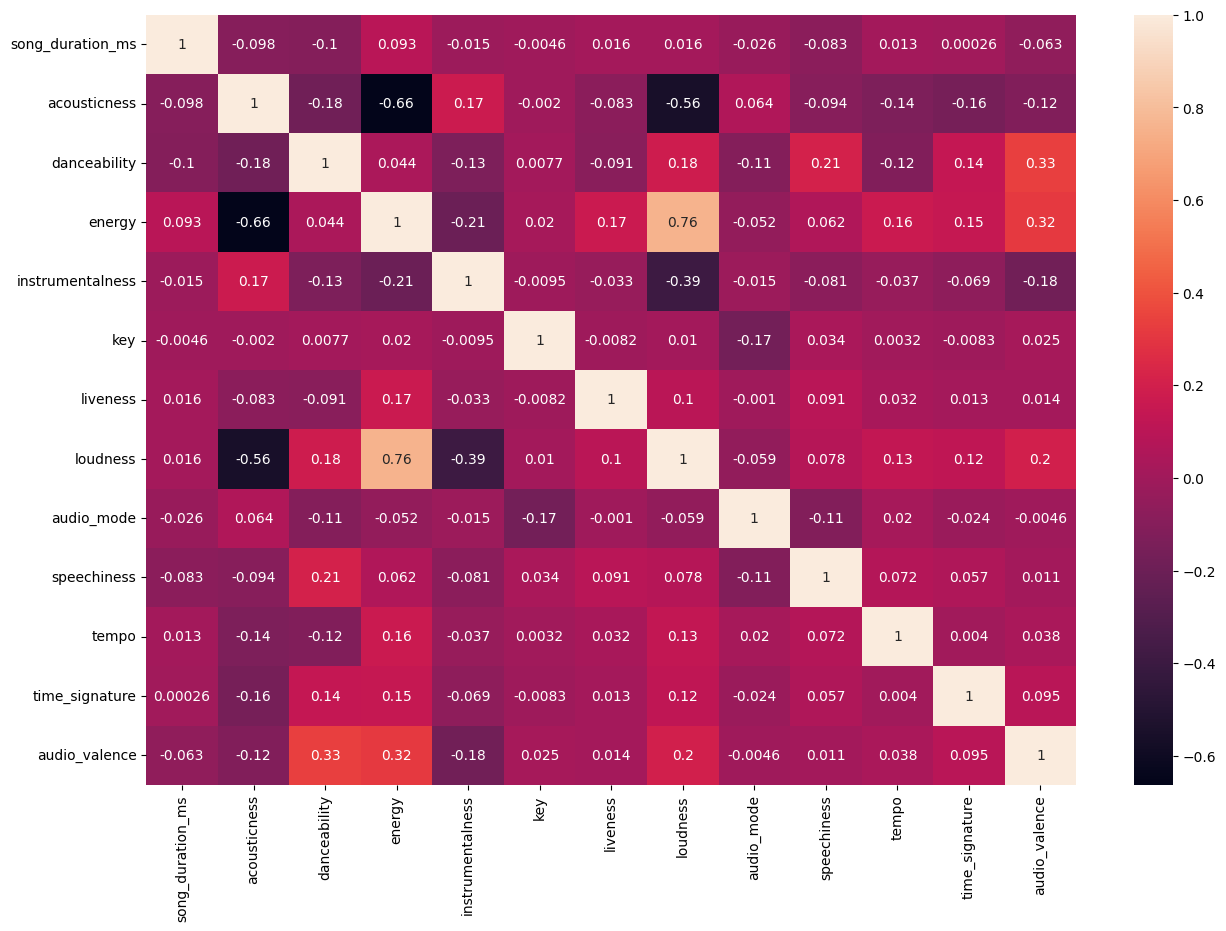

In [ ]:
#check colinearity
plt.figure(figsize=(15,10))
sns.heatmap(X.corr(),annot= True,)
plt.show()

Adanya korelasi yang kuat antara energy dengan loudness dan acousticness dengan energy. Ini perlu dipertimbangkan apakah kedua feature akan digunakan pada model

**Dengan Variabel Target**

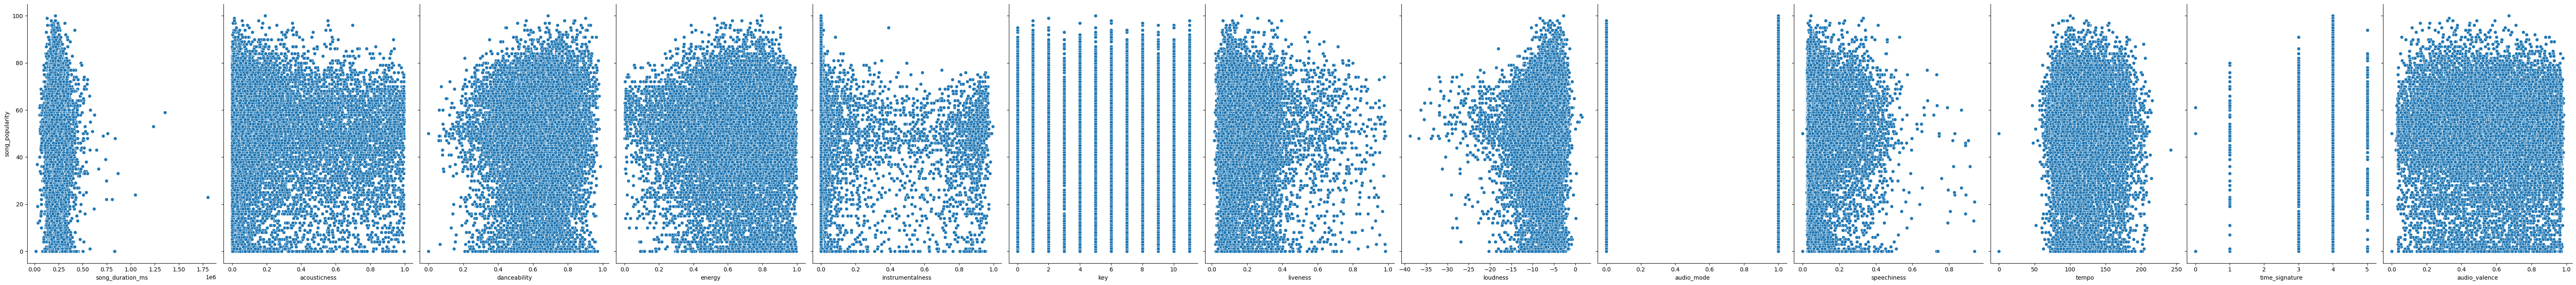

In [ ]:
# visualize the relationship between the features and the response using scatterplots
p = sns.pairplot(data, x_vars= ['song_duration_ms', 'acousticness', 'danceability', 'energy',
       'instrumentalness', 'key', 'liveness', 'loudness', 'audio_mode',
       'speechiness', 'tempo', 'time_signature', 'audio_valence'] , y_vars='song_popularity', size=7, aspect=0.7)

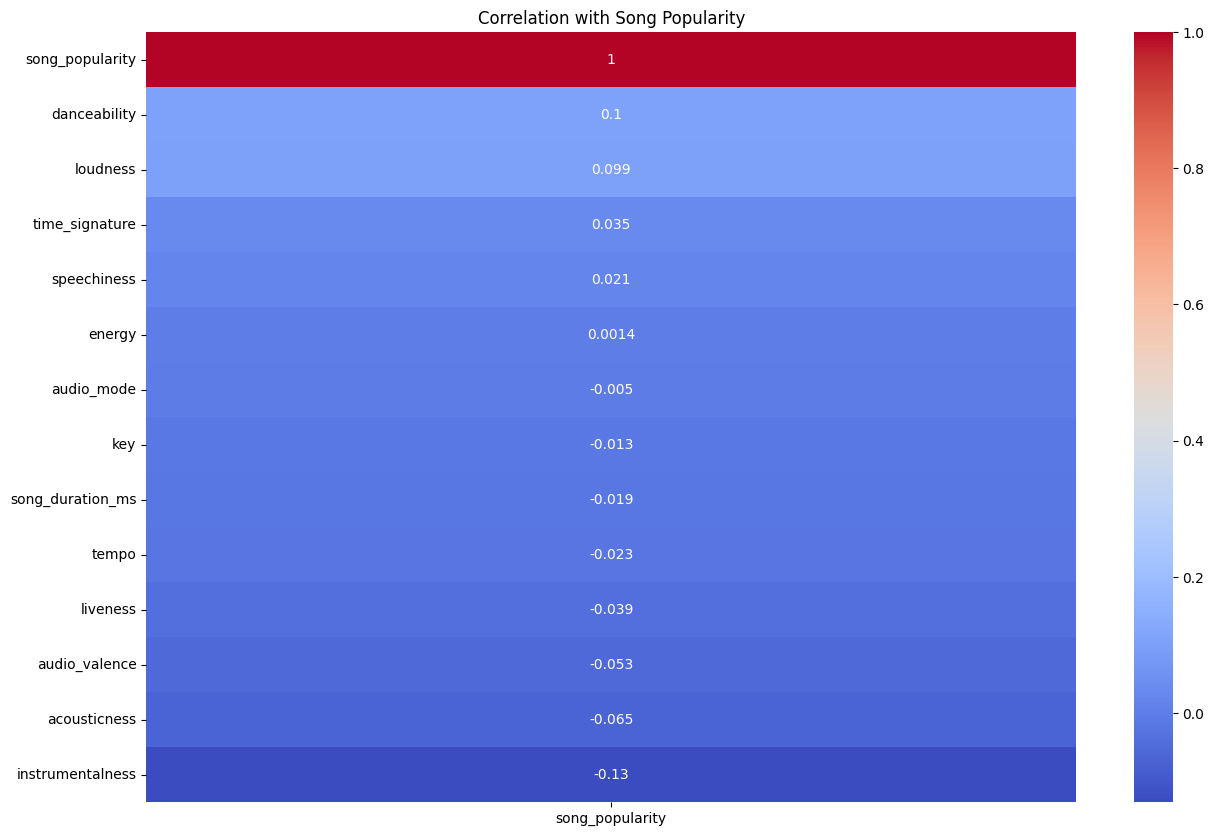

In [ ]:
plt.figure(figsize=(15, 10))
sns.heatmap(data.drop('song_name', axis=1).corr()[['song_popularity']].sort_values(by=['song_popularity'], ascending=False), annot=True, cmap='coolwarm')
plt.title('Correlation with Song Popularity')
plt.show()

Instrumental dan danceability memiliki korelasi yang paling tinggi dengan popularitas lagu

## **Basic Insight**

In [ ]:
#most popular song characteristic

most_popular_song = data.loc[data['song_popularity'].idxmax()]
print(most_popular_song)

song_name           Happier
song_popularity         100
song_duration_ms     214289
acousticness          0.191
danceability          0.687
energy                0.792
instrumentalness        0.0
key                       5
liveness              0.167
loudness             -2.749
audio_mode                1
speechiness          0.0452
tempo               100.015
time_signature            4
audio_valence         0.671
Name: 4299, dtype: object


In [ ]:
# top 10 most popular song

top_10_songs = data.sort_values('song_popularity', ascending=False).drop_duplicates(subset=['song_name']).head(10)
print(top_10_songs[['song_name', 'song_popularity']])


                                            song_name  song_popularity
7568                                          Happier              100
1229                           I Love It (& Lil Pump)               99
12665                 Eastside (with Halsey & Khalid)               98
15879                                  In My Feelings               98
61     Taki Taki (with Selena Gomez, Ozuna & Cardi B)               98
11899                       Promises (with Sam Smith)               98
1250                                       SICKO MODE               97
15664                                    Falling Down               97
7656                                       In My Mind               97
17587                                    Lucid Dreams               97


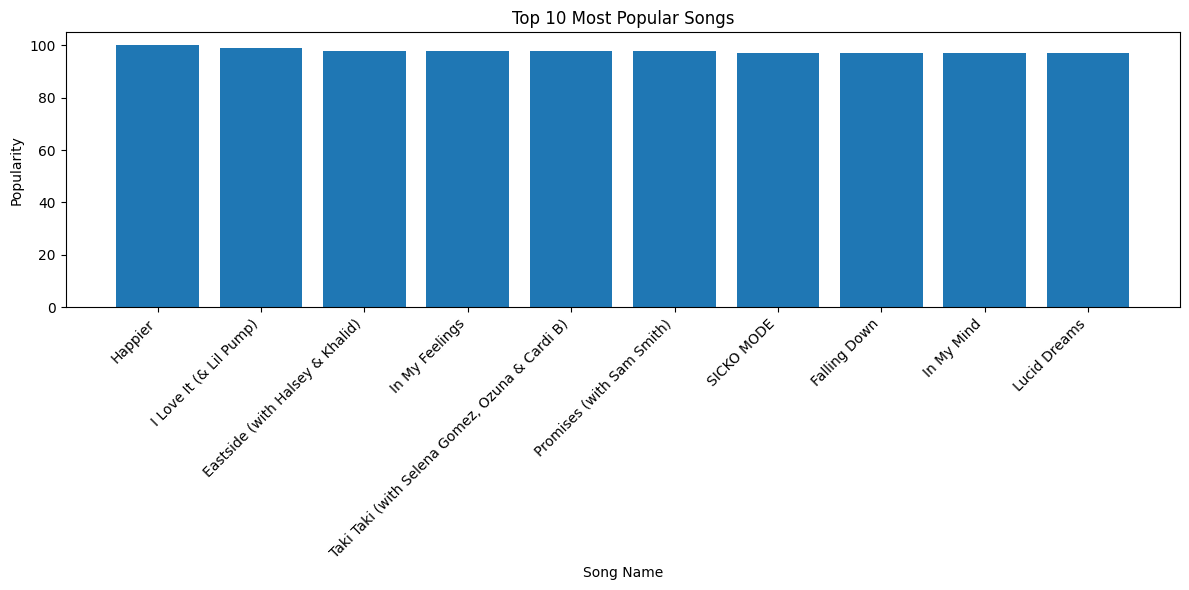

In [ ]:
# top 10 songs in bar plot

import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.bar(top_10_songs['song_name'], top_10_songs['song_popularity'])
plt.xlabel('Song Name')
plt.ylabel('Popularity')
plt.title('Top 10 Most Popular Songs')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


In [ ]:
# song with the longest duration characteristic

song_with_longest_duration = data.loc[data['song_duration_ms'].idxmax()]
print(song_with_longest_duration)


song_name           Army Arrangement
song_popularity                   23
song_duration_ms             1799346
acousticness                   0.468
danceability                   0.737
energy                         0.849
instrumentalness             0.00187
key                                0
liveness                      0.0862
loudness                      -5.587
audio_mode                         0
speechiness                   0.0688
tempo                         98.162
time_signature                     4
audio_valence                  0.686
Name: 18147, dtype: object


                                               song_name  song_duration_ms
18147                                   Army Arrangement           1799346
17797                                               Play           1355938
479    2112: Overture / The Temples Of Syrinx / Disco...           1233666
3727   I Have a Dream - The Complete Speech of Martin...           1047933
16825                                     Autobahn - 3-D            866889
501                               Do You Feel Like We Do            836666
11274                                       Babarabatiri            833493
11262                                          Mambo Inn            829586
1746                                     Shakara (Oloje)            805746
7378                                           Last Call            760973


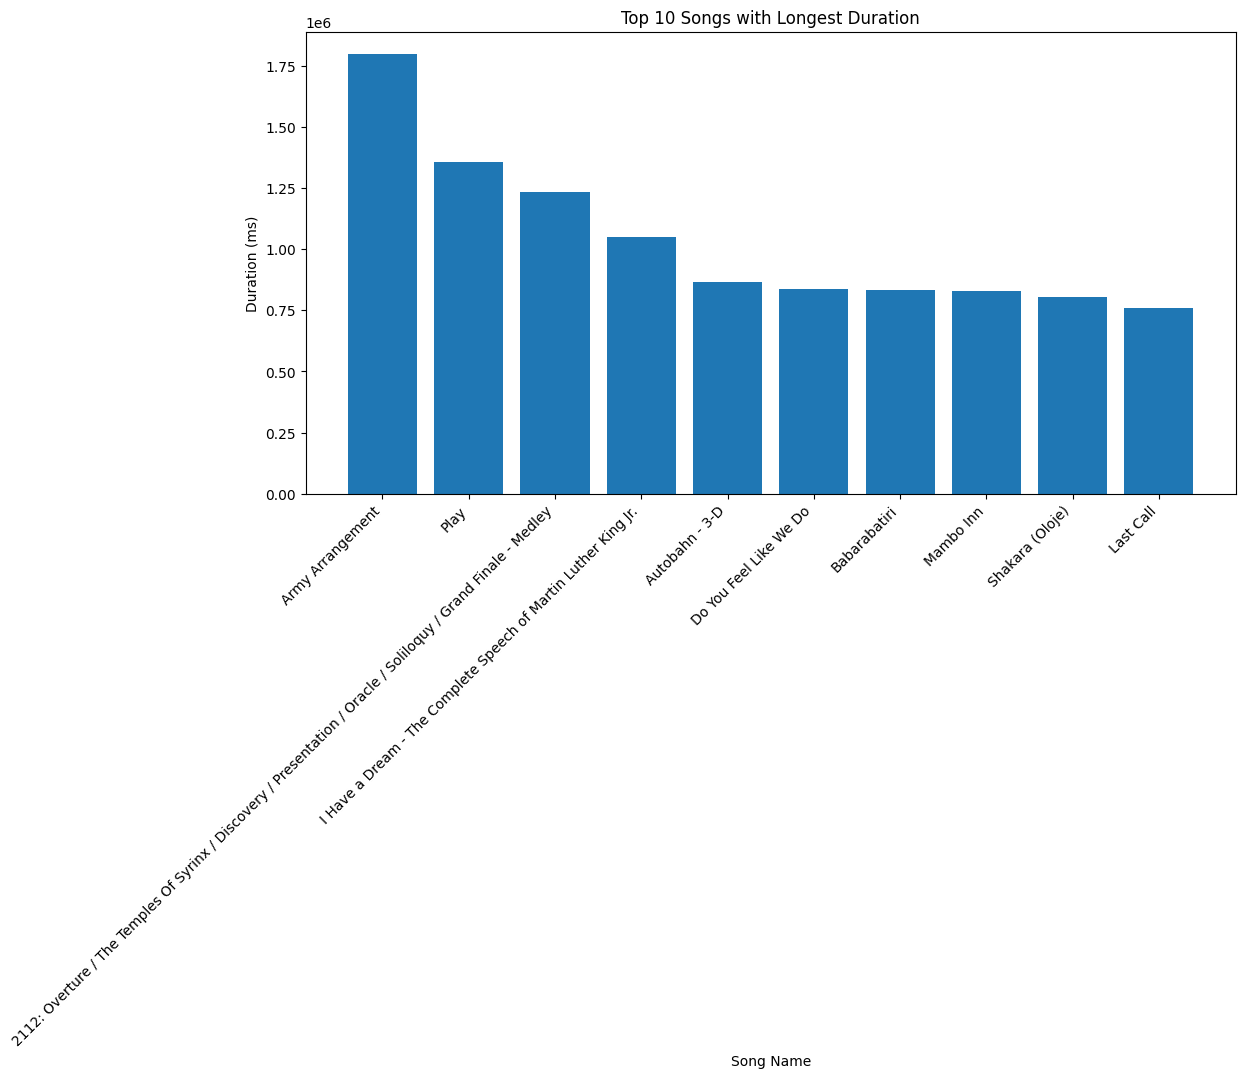

In [ ]:
# top 10 song with longest duration

top_10_longest_duration_songs = data.sort_values('song_duration_ms', ascending=False).drop_duplicates(subset=['song_name']).head(10)
print(top_10_longest_duration_songs[['song_name', 'song_duration_ms']])

plt.figure(figsize=(12, 6))
plt.bar(top_10_longest_duration_songs['song_name'], top_10_longest_duration_songs['song_duration_ms'])
plt.xlabel('Song Name')
plt.ylabel('Duration (ms)')
plt.title('Top 10 Songs with Longest Duration')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


# **2. Data Preprocessing**

## 1. Basic Information

In [ ]:
data.head()

,song_name,song_popularity,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence
0,Boulevard of Broken Dreams,73,262333,0.005520,0.496,0.682,0.000029,8,0.0589,-4.095,1,0.0294,167.060,4,0.474
1,In The End,66,216933,0.010300,0.542,0.853,0.000000,3,0.1080,-6.407,0,0.0498,105.256,4,0.370
2,Seven Nation Army,76,231733,0.008170,0.737,0.463,0.447000,0,0.2550,-7.828,1,0.0792,123.881,4,0.324
3,By The Way,74,216933,0.026400,0.451,0.970,0.003550,0,0.1020,-4.938,1,0.1070,122.444,4,0.198
4,How You Remind Me,56,223826,0.000954,0.447,0.766,0.000000,10,0.1130,-5.065,1,0.0313,172.011,4,0.574


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18835 entries, 0 to 18834
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   song_name         18835 non-null  object 
 1   song_popularity   18835 non-null  int64  
 2   song_duration_ms  18835 non-null  int64  
 3   acousticness      18835 non-null  float64
 4   danceability      18835 non-null  float64
 5   energy            18835 non-null  float64
 6   instrumentalness  18835 non-null  float64
 7   key               18835 non-null  int64  
 8   liveness          18835 non-null  float64
 9   loudness          18835 non-null  float64
 10  audio_mode        18835 non-null  int64  
 11  speechiness       18835 non-null  float64
 12  tempo             18835 non-null  float64
 13  time_signature    18835 non-null  int64  
 14  audio_valence     18835 non-null  float64
dtypes: float64(9), int64(5), object(1)
memory usage: 2.2+ MB


In [ ]:
data.shape

(18835, 15)

In [ ]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
song_popularity,18835.0,52.991877,21.905654,0.000000,40.0000,56.000000,69.00000,100.000
song_duration_ms,18835.0,218211.587576,59887.540566,12000.000000,184339.5000,211306.000000,242844.00000,1799346.000
acousticness,18835.0,0.258539,0.288719,0.000001,0.0241,0.132000,0.42400,0.996
danceability,18835.0,0.633348,0.156723,0.000000,0.5330,0.645000,0.74800,0.987
energy,18835.0,0.644995,0.214101,0.001070,0.5100,0.674000,0.81500,0.999
instrumentalness,18835.0,0.078008,0.221591,0.000000,0.0000,0.000011,0.00257,0.997
key,18835.0,5.289196,3.614595,0.000000,2.0000,5.000000,8.00000,11.000
liveness,18835.0,0.179650,0.143984,0.010900,0.0929,0.122000,0.22100,0.986
loudness,18835.0,-7.447435,3.827831,-38.768000,-9.0440,-6.555000,-4.90800,1.585
audio_mode,18835.0,0.628139,0.483314,0.000000,0.0000,1.000000,1.00000,1.000


## 2. Check Unique Value

In [ ]:
data.nunique().sort_values()

,0
audio_mode,2
time_signature,5
key,12
song_popularity,101
danceability,849
energy,1132
speechiness,1224
audio_valence,1246
liveness,1425
acousticness,3209


## 3. Check Missing Value

In [ ]:
data.isna().sum()

,0
song_name,0
song_popularity,0
song_duration_ms,0
acousticness,0
danceability,0
energy,0
instrumentalness,0
key,0
liveness,0
loudness,0


## 4. Check Duplicate Values

In [ ]:
df_temp = data.copy()

In [ ]:
df_temp

,song_name,song_popularity,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence
0,Boulevard of Broken Dreams,73,262333,0.005520,0.496,0.682,0.000029,8,0.0589,-4.095,1,0.0294,167.060,4,0.474
1,In The End,66,216933,0.010300,0.542,0.853,0.000000,3,0.1080,-6.407,0,0.0498,105.256,4,0.370
2,Seven Nation Army,76,231733,0.008170,0.737,0.463,0.447000,0,0.2550,-7.828,1,0.0792,123.881,4,0.324
3,By The Way,74,216933,0.026400,0.451,0.970,0.003550,0,0.1020,-4.938,1,0.1070,122.444,4,0.198
4,How You Remind Me,56,223826,0.000954,0.447,0.766,0.000000,10,0.1130,-5.065,1,0.0313,172.011,4,0.574
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18830,Let It Breathe,60,159645,0.893000,0.500,0.151,0.000065,11,0.1110,-16.107,1,0.0348,113.969,4,0.300
18831,Answers,60,205666,0.765000,0.495,0.161,0.000001,11,0.1050,-14.078,0,0.0301,94.286,4,0.265
18832,Sudden Love (Acoustic),23,182211,0.847000,0.719,0.325,0.000000,0,0.1250,-12.222,1,0.0355,130.534,4,0.286
18833,Gentle on My Mind,55,352280,0.945000,0.488,0.326,0.015700,3,0.1190,-12.020,1,0.0328,106.063,4,0.323


In [ ]:
df_temp[(df_temp.duplicated())]

,song_name,song_popularity,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence
173,Sex on Fire,81,203346,0.00172,0.542,0.905,0.010400,9,0.1360,-5.653,1,0.0540,153.398,4,0.374
179,Use Somebody,79,230760,0.00552,0.276,0.715,0.000417,0,0.2010,-5.356,1,0.0432,137.028,4,0.173
212,Hips Don't Lie,84,218093,0.28400,0.778,0.824,0.000000,10,0.4050,-5.892,0,0.0712,100.024,4,0.756
414,Hotel California - Remastered,83,391376,0.00574,0.579,0.508,0.000494,2,0.0575,-9.484,1,0.0270,147.125,4,0.609
421,Me and Bobby McGee,69,271333,0.30200,0.453,0.464,0.000060,2,0.1520,-10.960,1,0.0431,93.190,4,0.658
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18797,The Time I've Wasted,63,213249,0.79600,0.473,0.250,0.000088,5,0.1010,-11.263,1,0.0304,145.027,4,0.261
18811,Oceans,69,216186,0.27400,0.404,0.480,0.000009,9,0.1320,-8.906,0,0.0303,129.162,3,0.200
18817,Life Is Confusing,64,171413,0.95500,0.373,0.216,0.001050,1,0.0739,-11.410,1,0.0326,129.030,4,0.496
18826,Call It Dreaming,67,231760,0.61000,0.519,0.515,0.000057,5,0.1070,-9.448,1,0.0310,80.329,4,0.714


In [ ]:
df_temp[(df_temp['song_name'] == 'Hotel California - Remastered')]

,song_name,song_popularity,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence
353,Hotel California - Remastered,83,391376,0.00574,0.579,0.508,0.000494,2,0.0575,-9.484,1,0.027,147.125,4,0.609
414,Hotel California - Remastered,83,391376,0.00574,0.579,0.508,0.000494,2,0.0575,-9.484,1,0.027,147.125,4,0.609
2140,Hotel California - Remastered,83,391376,0.00574,0.579,0.508,0.000494,2,0.0575,-9.484,1,0.027,147.125,4,0.609
7767,Hotel California - Remastered,83,391376,0.00574,0.579,0.508,0.000494,2,0.0575,-9.484,1,0.027,147.125,4,0.609


In [ ]:
df_temp.drop_duplicates(keep='first',inplace=True)

In [ ]:
df_temp

,song_name,song_popularity,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence
0,Boulevard of Broken Dreams,73,262333,0.005520,0.496,0.682,0.000029,8,0.0589,-4.095,1,0.0294,167.060,4,0.474
1,In The End,66,216933,0.010300,0.542,0.853,0.000000,3,0.1080,-6.407,0,0.0498,105.256,4,0.370
2,Seven Nation Army,76,231733,0.008170,0.737,0.463,0.447000,0,0.2550,-7.828,1,0.0792,123.881,4,0.324
3,By The Way,74,216933,0.026400,0.451,0.970,0.003550,0,0.1020,-4.938,1,0.1070,122.444,4,0.198
4,How You Remind Me,56,223826,0.000954,0.447,0.766,0.000000,10,0.1130,-5.065,1,0.0313,172.011,4,0.574
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18830,Let It Breathe,60,159645,0.893000,0.500,0.151,0.000065,11,0.1110,-16.107,1,0.0348,113.969,4,0.300
18831,Answers,60,205666,0.765000,0.495,0.161,0.000001,11,0.1050,-14.078,0,0.0301,94.286,4,0.265
18832,Sudden Love (Acoustic),23,182211,0.847000,0.719,0.325,0.000000,0,0.1250,-12.222,1,0.0355,130.534,4,0.286
18833,Gentle on My Mind,55,352280,0.945000,0.488,0.326,0.015700,3,0.1190,-12.020,1,0.0328,106.063,4,0.323


## 5. Check Outliers

In [ ]:
df_temp.columns

Index(['song_name', 'song_popularity', 'song_duration_ms', 'acousticness',
       'danceability', 'energy', 'instrumentalness', 'key', 'liveness',
       'loudness', 'audio_mode', 'speechiness', 'tempo', 'time_signature',
       'audio_valence'],
      dtype='object')

In [ ]:
df_temp.drop(['song_name'], axis=1, inplace=True)

In [ ]:
categorical_cols = []
numerical_cols = []
for col in df_temp.columns:
    if df_temp[col].nunique() <= 15:
        categorical_cols.append(col)
    else:
        numerical_cols.append(col)

print(f'Categorical Columns: {categorical_cols}')
print(f'Numerical Columns: {numerical_cols}')

Categorical Columns: ['key', 'audio_mode', 'time_signature']
Numerical Columns: ['song_popularity', 'song_duration_ms', 'acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness', 'loudness', 'speechiness', 'tempo', 'audio_valence']


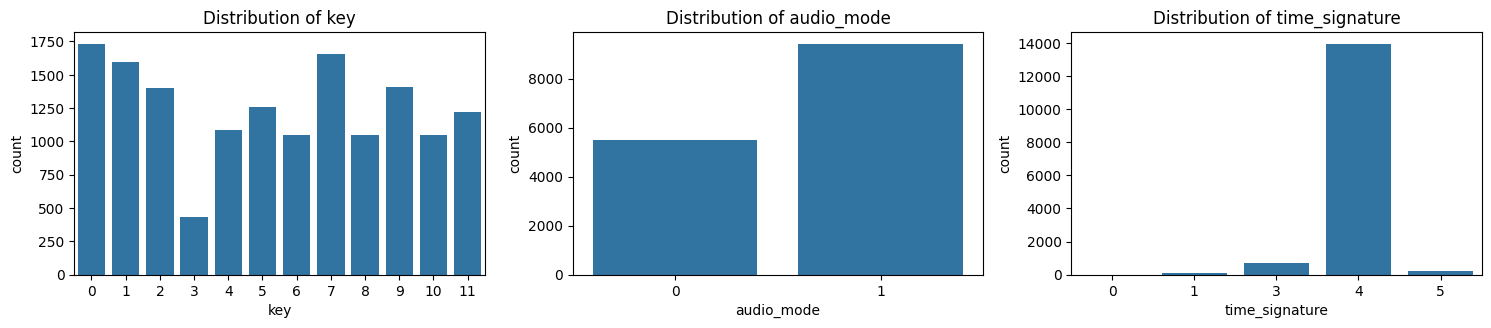

In [ ]:
plt.figure(figsize=(20, 18))

for i, col in enumerate(categorical_cols):
    plt.subplot(6, 4, i + 1)
    sns.countplot(data=df_temp, x=col)
    plt.title(f'Distribution of {col}')
    plt.tight_layout()

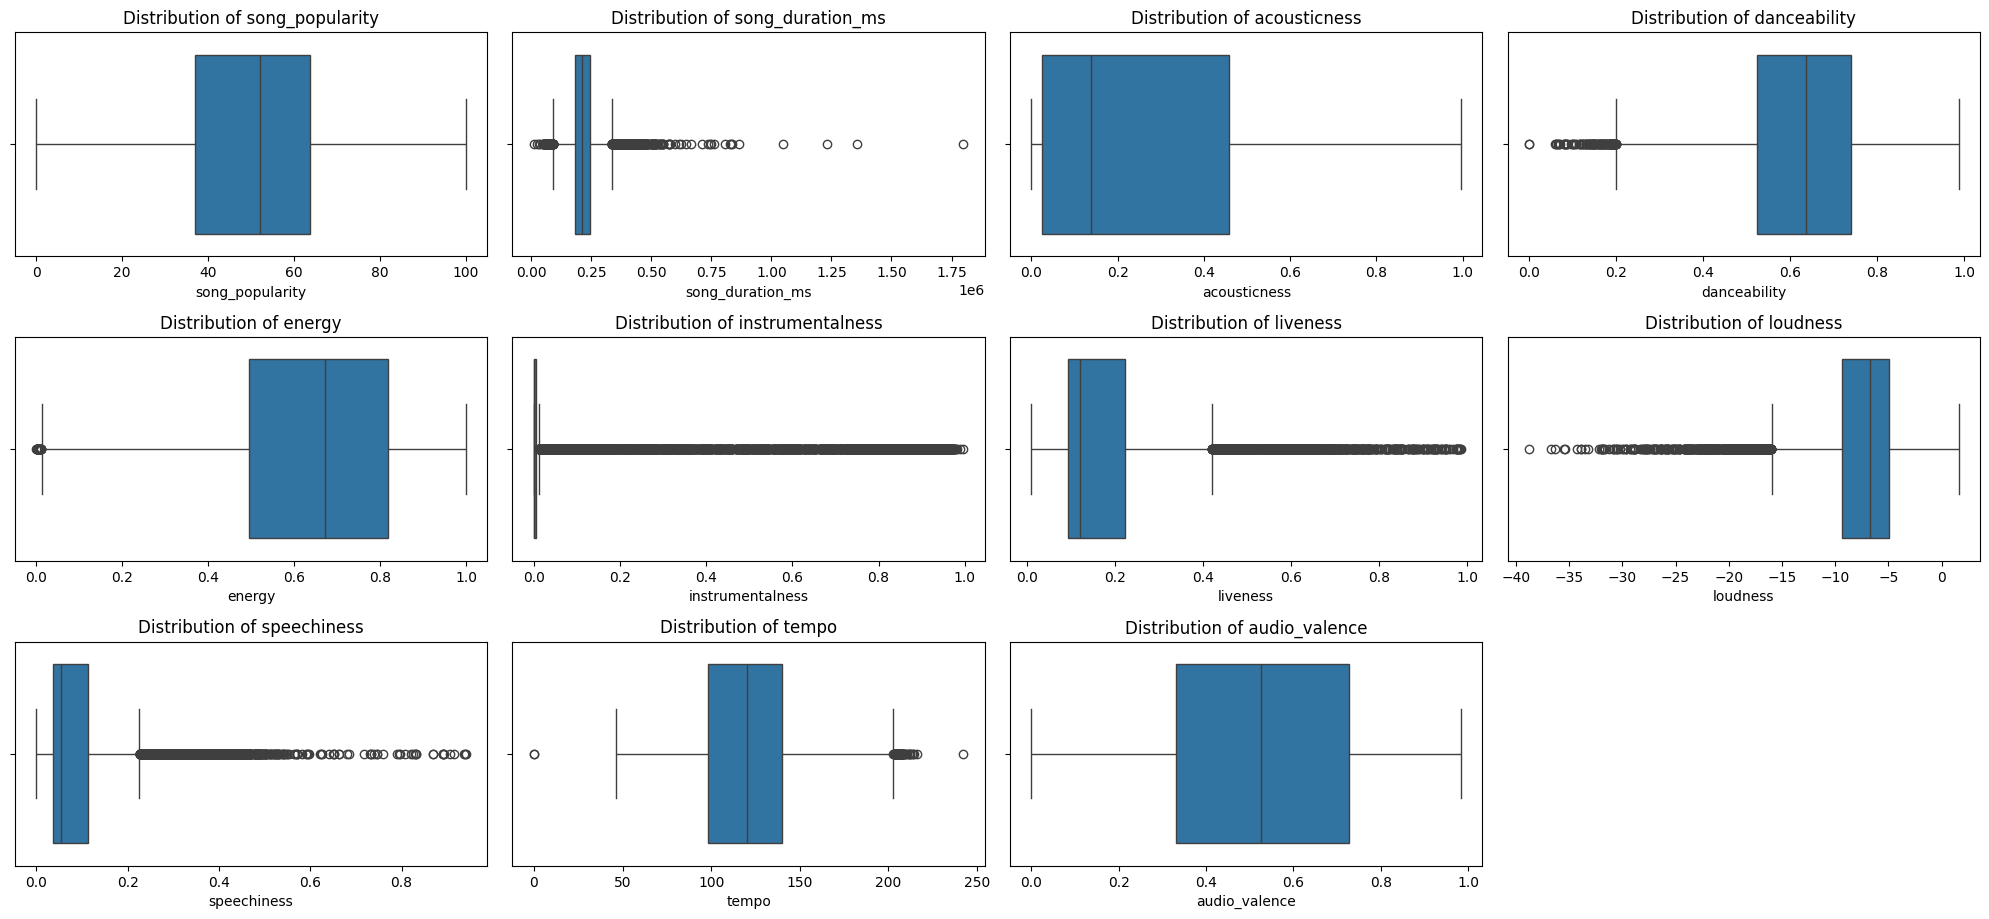

In [ ]:
plt.figure(figsize=(20, 18))

for i, col in enumerate(numerical_cols):
    plt.subplot(6, 4, i + 1)
    sns.boxplot(data=df_temp, x=col)
    plt.title(f'Distribution of {col}')
    plt.tight_layout()

plt.show()

In [ ]:
def remove_outliers(df, cols):
    for col in cols:
        # Menghitung Q1 dan Q3
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1

        # Menentukan batas bawah dan atas
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Menghapus outlier
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]

    return df

# Kolom yang ingin dibersihkan dari outlier
cols_to_clean = numerical_cols

# Menghapus outlier pada kolom tertentu
df_cleaned = remove_outliers(df_temp, cols_to_clean)

df_cleaned.shape

(8930, 14)

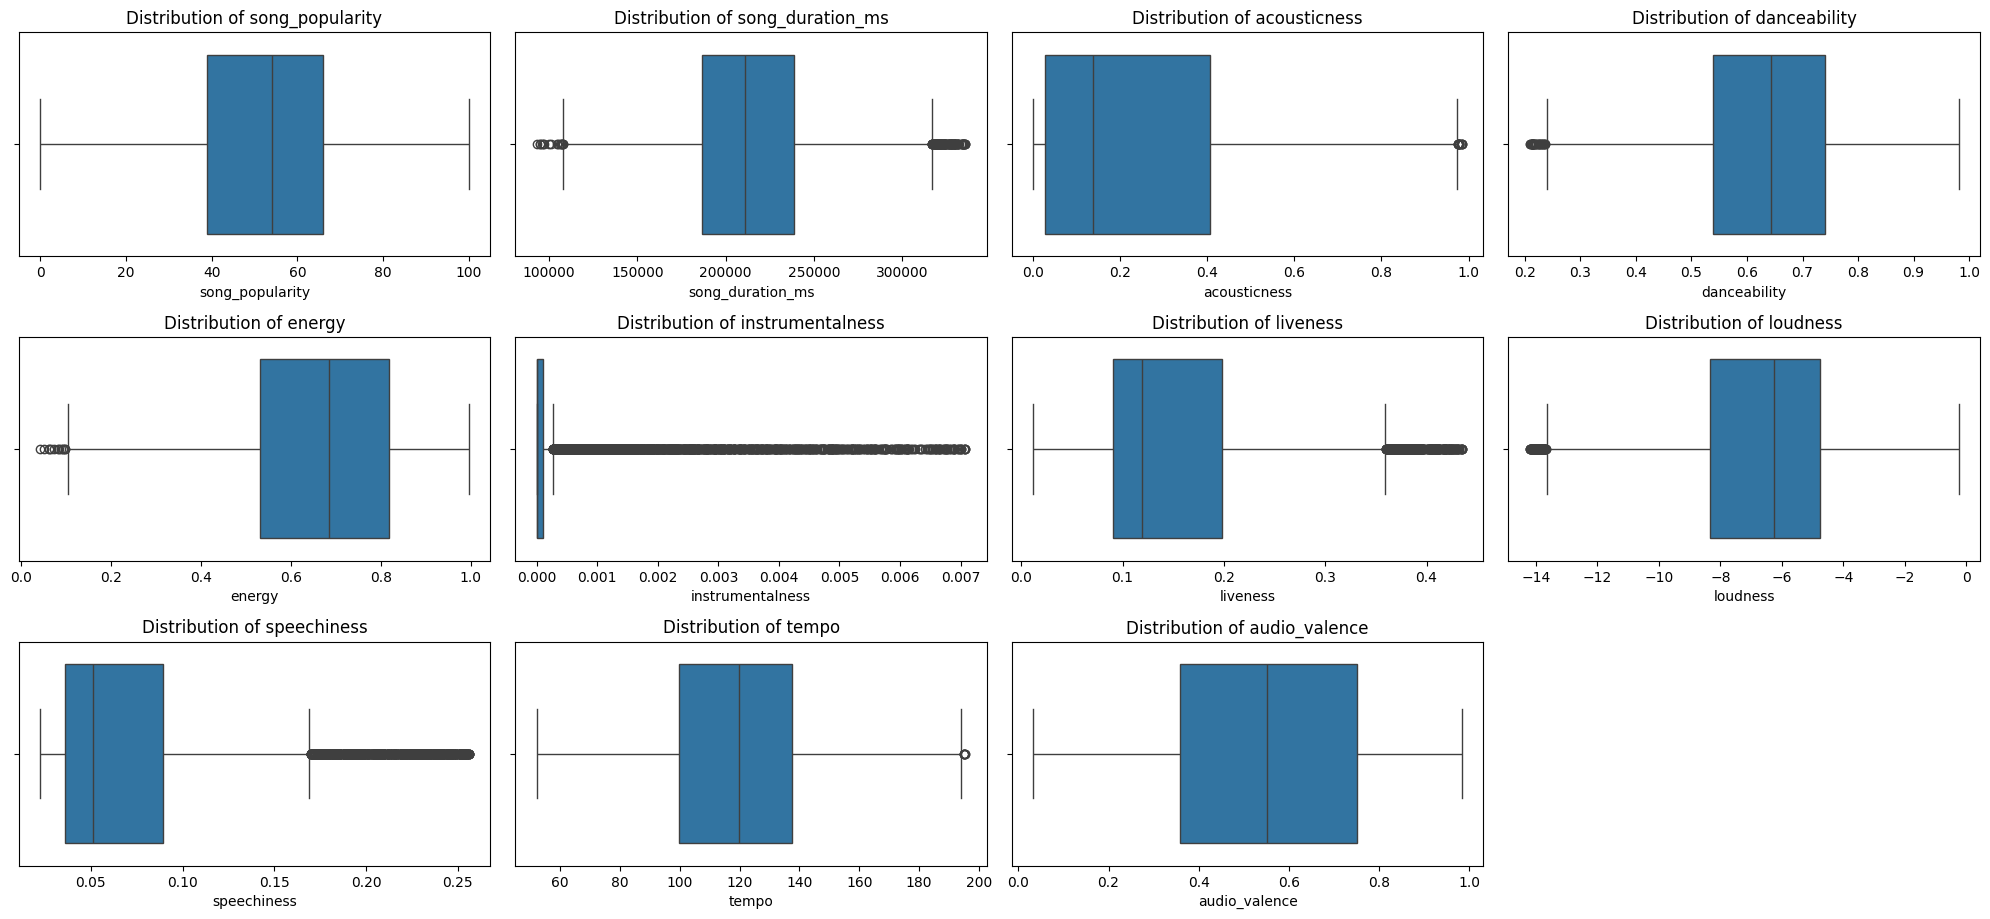

In [ ]:
plt.figure(figsize=(20, 18))

columns = numerical_cols

for i, col in enumerate(columns):
    plt.subplot(6, 4, i + 1)
    sns.boxplot(data=df_cleaned, x=col)
    plt.title(f'Distribution of {col}')
    plt.tight_layout()

plt.show()

In [ ]:
df_cleaned.describe().T

,count,mean,std,min,25%,50%,75%,max
song_popularity,8930.0,50.445577,20.698054,0.000000,39.000000,54.000000,66.000000,100.00000
song_duration_ms,8930.0,213986.194737,41521.872725,93043.000000,186323.250000,211162.500000,238502.750000,335693.00000
acousticness,8930.0,0.247900,0.268978,0.000003,0.027125,0.137000,0.406000,0.98500
danceability,8930.0,0.634088,0.146220,0.209000,0.539000,0.643000,0.740000,0.98100
energy,8930.0,0.662503,0.194128,0.042700,0.531000,0.686000,0.818000,0.99600
instrumentalness,8930.0,0.000392,0.001086,0.000000,0.000000,0.000002,0.000109,0.00708
key,8930.0,5.320829,3.577531,0.000000,2.000000,6.000000,8.000000,11.00000
liveness,8930.0,0.154198,0.092407,0.011900,0.090500,0.119000,0.198000,0.43500
loudness,8930.0,-6.747304,2.688613,-14.197000,-8.328250,-6.251500,-4.764750,-0.25700
audio_mode,8930.0,0.646473,0.478091,0.000000,0.000000,1.000000,1.000000,1.00000


## 6. Split Dataset

In [ ]:
target = df_cleaned["song_popularity"]
df_tmp = df_cleaned.drop(columns="song_popularity")

In [ ]:
#80% Training and 20% Test
X_train, X_test, y_train, y_test = train_test_split(df_tmp, target,
                                                    test_size = 0.2,
                                                    random_state = 0)

In [ ]:
print("Dimensi X_train dataset: ", X_train.shape)
print("Dimensi y_train dataset: ", y_train.shape)
print("Dimensi X_test dataset: ", X_test.shape)
print("Dimensi y_test dataset: ", y_test.shape)

Dimensi X_train dataset:  (7144, 13)
Dimensi y_train dataset:  (7144,)
Dimensi X_test dataset:  (1786, 13)
Dimensi y_test dataset:  (1786,)


## 7. Scaling

In [ ]:
scaler = RobustScaler()
X_train2 = pd.DataFrame(scaler.fit_transform(X_train))
X_train2.columns = X_train.columns.values
X_train2.index = X_train.index.values
X_train = X_train2

X_test2 = pd.DataFrame(scaler.transform(X_test))
X_test2.columns = X_test.columns.values
X_test2.index = X_test.index.values
X_test = X_test2

In [ ]:
X_train

,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence
2340,-0.115291,-0.057902,-0.562189,0.200000,-0.011261,-0.500000,-0.422719,0.165815,0.0,-0.456189,-0.514625,0.0,-0.237245
11980,0.117094,0.736939,-0.597015,-0.877193,-0.022342,-0.333333,-0.093110,-0.482334,0.0,-0.357904,0.194790,0.0,-0.959184
16317,-1.704629,-0.305567,0.089552,0.112281,0.055946,0.166667,1.461825,0.183726,0.0,0.148354,0.519506,0.0,-0.655612
14155,-0.664818,-0.344940,-0.522388,1.045614,2.824505,-0.166667,1.871508,0.722172,0.0,0.569309,0.336038,0.0,-0.489796
12999,0.427800,0.481642,0.238806,-0.221053,0.230811,0.333333,-0.284916,0.747359,0.0,0.159481,-1.370530,-1.0,-0.130102
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8135,1.206107,0.110541,0.412935,0.540351,-0.001081,-0.166667,-0.065177,-0.786259,0.0,-0.294854,0.298105,0.0,0.505102
16001,0.925120,-0.357521,-1.189055,0.589474,-0.022342,-0.666667,0.102421,0.185405,0.0,-0.272601,1.404538,0.0,-0.165816
9199,1.649397,-0.283985,0.567164,0.340351,19.437117,0.666667,1.899441,-0.543903,-1.0,2.143718,-0.666615,0.0,0.747449
5649,-0.395735,0.489538,0.373134,-0.543860,7.878559,-1.000000,0.018622,-0.383265,0.0,0.090867,1.473716,0.0,0.696429


In [ ]:
X_test

,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence
4272,-0.934154,-0.357679,-0.189055,0.224561,-0.022342,0.333333,-0.335196,0.254810,0.0,0.621233,0.006314,0.0,-0.071429
12907,-0.009305,-0.356021,-0.960199,1.007018,-0.022342,0.666667,0.204842,0.725810,0.0,-0.070468,0.622252,0.0,-0.341837
8240,-1.314128,0.326359,0.094527,-0.445614,-0.022342,-0.333333,-0.589385,-0.557056,0.0,-0.044506,0.142319,0.0,1.043367
548,1.412107,-0.360284,-0.835821,1.028070,26.824505,0.166667,0.763501,0.675715,-1.0,2.310617,-0.786017,0.0,-0.795918
5161,-1.151805,0.610607,-0.238806,-0.715789,0.792072,0.166667,1.964618,-1.616596,0.0,-0.302272,-0.742481,0.0,0.640306
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8940,1.160859,0.336886,0.835821,-0.792982,-0.022342,-0.333333,0.512104,-0.347443,-1.0,0.993973,0.132094,0.0,-0.140306
1771,-0.551078,0.523753,0.164179,0.210526,-0.022342,-0.666667,-0.409683,0.130274,0.0,-0.092721,-0.668939,0.0,-0.002551
9375,0.113992,-0.151336,0.621891,0.873684,0.503784,-0.166667,-0.346369,-0.620304,-1.0,2.718591,-0.889410,0.0,0.637755
8365,0.532739,-0.116331,0.164179,0.578947,-0.022342,-1.000000,0.018622,0.675156,0.0,0.298563,-0.511862,0.0,0.339286


In [ ]:
# Simpan hasil preprocessing
with open('preprocessed_data.pkl', 'wb') as f:
  pickle.dump({'X_train': X_train, 'X_test': X_test, 'y_train': y_train, 'y_test': y_test}, f)

In [ ]:
# Load saved data
with open('preprocessed_data.pkl', 'rb') as f:
    data = pickle.load(f)

X_train = data['X_train']
X_test = data['X_test']
y_train = data['y_train']
y_test = data['y_test']

In [ ]:
X_train

,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence
2340,-0.115291,-0.057902,-0.562189,0.200000,-0.011261,-0.500000,-0.422719,0.165815,0.0,-0.456189,-0.514625,0.0,-0.237245
11980,0.117094,0.736939,-0.597015,-0.877193,-0.022342,-0.333333,-0.093110,-0.482334,0.0,-0.357904,0.194790,0.0,-0.959184
16317,-1.704629,-0.305567,0.089552,0.112281,0.055946,0.166667,1.461825,0.183726,0.0,0.148354,0.519506,0.0,-0.655612
14155,-0.664818,-0.344940,-0.522388,1.045614,2.824505,-0.166667,1.871508,0.722172,0.0,0.569309,0.336038,0.0,-0.489796
12999,0.427800,0.481642,0.238806,-0.221053,0.230811,0.333333,-0.284916,0.747359,0.0,0.159481,-1.370530,-1.0,-0.130102
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8135,1.206107,0.110541,0.412935,0.540351,-0.001081,-0.166667,-0.065177,-0.786259,0.0,-0.294854,0.298105,0.0,0.505102
16001,0.925120,-0.357521,-1.189055,0.589474,-0.022342,-0.666667,0.102421,0.185405,0.0,-0.272601,1.404538,0.0,-0.165816
9199,1.649397,-0.283985,0.567164,0.340351,19.437117,0.666667,1.899441,-0.543903,-1.0,2.143718,-0.666615,0.0,0.747449
5649,-0.395735,0.489538,0.373134,-0.543860,7.878559,-1.000000,0.018622,-0.383265,0.0,0.090867,1.473716,0.0,0.696429


In [ ]:
X_test

,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence
4272,-0.934154,-0.357679,-0.189055,0.224561,-0.022342,0.333333,-0.335196,0.254810,0.0,0.621233,0.006314,0.0,-0.071429
12907,-0.009305,-0.356021,-0.960199,1.007018,-0.022342,0.666667,0.204842,0.725810,0.0,-0.070468,0.622252,0.0,-0.341837
8240,-1.314128,0.326359,0.094527,-0.445614,-0.022342,-0.333333,-0.589385,-0.557056,0.0,-0.044506,0.142319,0.0,1.043367
548,1.412107,-0.360284,-0.835821,1.028070,26.824505,0.166667,0.763501,0.675715,-1.0,2.310617,-0.786017,0.0,-0.795918
5161,-1.151805,0.610607,-0.238806,-0.715789,0.792072,0.166667,1.964618,-1.616596,0.0,-0.302272,-0.742481,0.0,0.640306
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8940,1.160859,0.336886,0.835821,-0.792982,-0.022342,-0.333333,0.512104,-0.347443,-1.0,0.993973,0.132094,0.0,-0.140306
1771,-0.551078,0.523753,0.164179,0.210526,-0.022342,-0.666667,-0.409683,0.130274,0.0,-0.092721,-0.668939,0.0,-0.002551
9375,0.113992,-0.151336,0.621891,0.873684,0.503784,-0.166667,-0.346369,-0.620304,-1.0,2.718591,-0.889410,0.0,0.637755
8365,0.532739,-0.116331,0.164179,0.578947,-0.022342,-1.000000,0.018622,0.675156,0.0,0.298563,-0.511862,0.0,0.339286


In [ ]:
y_train

,song_popularity
2340,25
11980,61
16317,29
14155,51
12999,68
...,...
8135,48
16001,64
9199,26
5649,51


In [ ]:
y_test

,song_popularity
4272,66
12907,62
8240,64
548,57
5161,40
...,...
8940,0
1771,35
9375,52
8365,72


# **3. Modeling**

# 1. Model Selection

In [ ]:
_# Import the necessary regression models from sklearn
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor, AdaBoostRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.model_selection import KFold, RandomizedSearchCV, cross_val_score, cross_validate
from sklearn.metrics import make_scorer, mean_squared_error, mean_absolute_error, r2_score

# Run this If you use Intel CPU to boost Sklearn model training and inference speed
# from sklearnex import patch_sklearn
# patch_sklearn()

import numpy as np
import csv
import os
from datetime import timedelta
import time

# Random seed for reproducibility
random_seed = 42

# Define models
models = {
    'LGBMRegressor': LGBMRegressor(random_state=random_seed),
    'RandomForest': RandomForestRegressor(random_state=random_seed),
    'XGBoost': XGBRegressor(random_state=random_seed),
    'GradientBoostingRegressor': GradientBoostingRegressor(random_state=random_seed),
    'AdaBoostRegressor': AdaBoostRegressor(random_state=random_seed),
    'LinearRegression': LinearRegression(),  # Added LinearRegression
}

param_grids = {
    'LGBMRegressor': {
        'n_estimators': [50, 100],
        'learning_rate': [0.01, 0.1],
        'num_leaves': [31],
        'subsample': [0.8, 1.0],
    },
    'RandomForest': {
        'n_estimators': [50, 100],
        'max_depth': [10, 20],
    },
    'XGBoost': {
        'n_estimators': [50, 100],
        'max_depth': [3, 5],
        'learning_rate': [0.01, 0.1],
    },
    'GradientBoostingRegressor': {
        'n_estimators': [100, 200],
        'learning_rate': [0.01, 0.1],
        'max_depth': [3, 5],
    },
    'AdaBoostRegressor': {
        'n_estimators': [50, 100],
        'learning_rate': [0.01, 0.1],
    },
    'LinearRegression': {},  # No hyperparameters for LinearRegression
}

/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


# 2. K FOLD CROSS VALIDATION WITH RANDOMNIZED SEARCH HYPER PARAMETER TUNING

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np

# Inisialisasi dictionary untuk menyimpan hasil evaluasi dan best model
results = []
best_models = {}

# Iterate over each model and parameter grid
for model_name, model in models.items():
    print(f'Evaluating {model_name}...')

    # Use RandomizedSearchCV for faster hyperparameter tuning
    search = RandomizedSearchCV(
        estimator=model,
        param_distributions=param_grids.get(model_name, {}),
        n_iter=5,  # Limit number of random combinations
        cv=3,  # Reduced number of folds for faster evaluation
        scoring='neg_mean_squared_error',
        random_state=random_seed,
        n_jobs=-1,  # Parallel processing
    )

    search.fit(X_train, y_train)
    best_model = search.best_estimator_

    # Store the best model for each algorithm
    best_models[model_name] = best_model

    # Predictions
    predictions = best_model.predict(X_test)

    # Evaluation metrics
    r2 = r2_score(y_test, predictions)
    mae = mean_absolute_error(y_test, predictions)
    mse = mean_squared_error(y_test, predictions)
    rmse = np.sqrt(mse)

    # Store the results for each model
    results.append({
        'model': model_name,
        'r2': r2,
        'mae': mae,
        'mse': mse,
        'rmse': rmse
    })

    print(f'{model_name} - R2: {r2:.4f}, MAE: {mae:.4f}, MSE: {mse:.4f}, RMSE: {rmse:.4f}')

Evaluating LGBMRegressor...
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000536 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2568
[LightGBM] [Info] Number of data points in the train set: 7144, number of used features: 13
[LightGBM] [Info] Start training from score 50.468225
LGBMRegressor - R2: 0.0361, MAE: 16.2427, MSE: 418.2725, RMSE: 20.4517
Evaluating RandomForest...
RandomForest - R2: 0.0449, MAE: 16.1841, MSE: 414.4264, RMSE: 20.3575
Evaluating XGBoost...
XGBoost - R2: 0.0276, MAE: 16.3097, MSE: 421.9599, RMSE: 20.5417
Evaluating GradientBoostingRegressor...
GradientBoostingRegressor - R2: 0.0341, MAE: 16.2590, MSE: 419.1412, RMSE: 20.4729
Evaluating AdaBoostRegressor...
AdaBoostRegressor - R2: 0.0324, MAE: 16.3431, MSE: 419.8789, RMSE: 20.4909
Evaluating LinearRegression...
LinearRegression - R2: 0.0268, MAE: 16.2675, MSE: 

# **4. Evaluation**

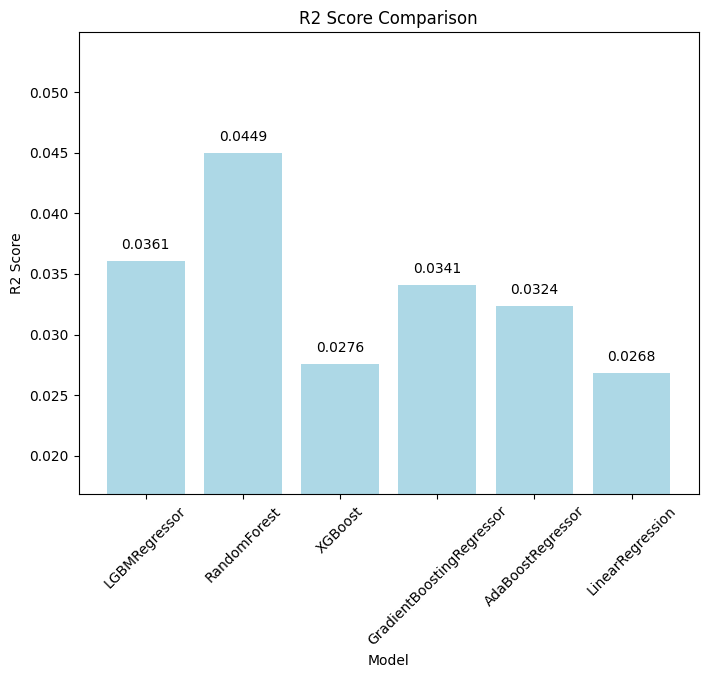

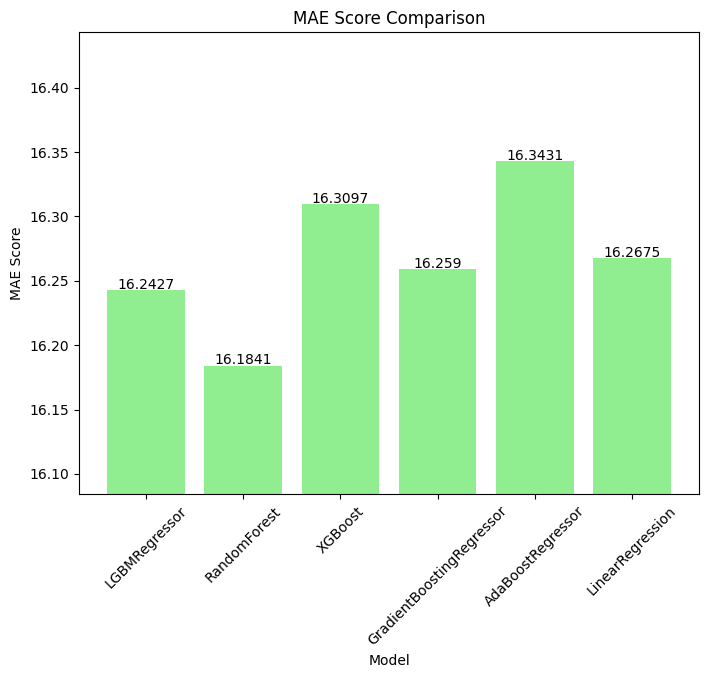

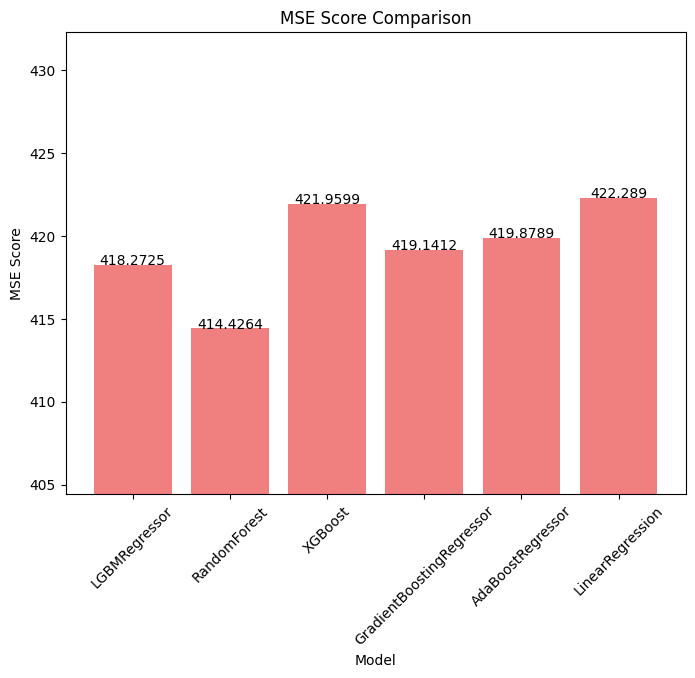

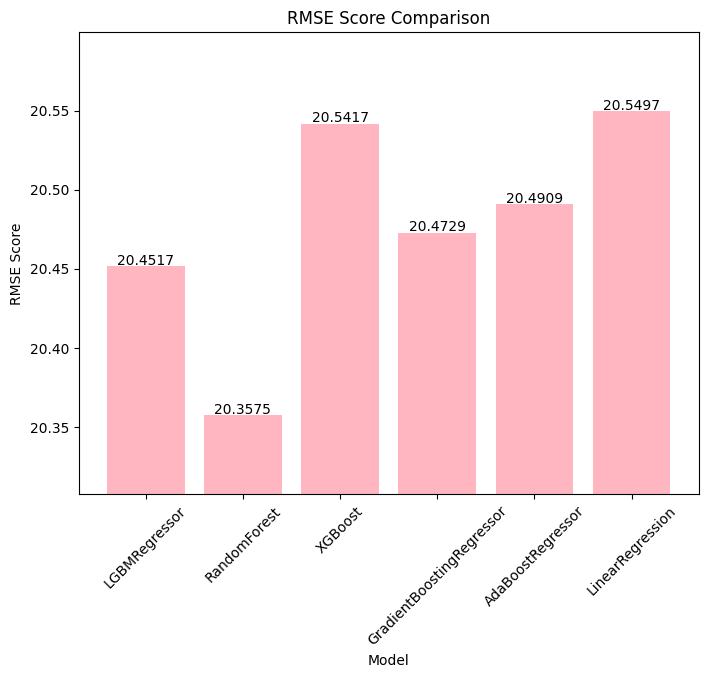

In [ ]:
# Ambil data dari dictionary `results`
model_names = [result['model'] for result in results]
r2_scores = [result['r2'] for result in results]
mae_scores = [result['mae'] for result in results]
mse_scores = [result['mse'] for result in results]
rmse_scores = [result['rmse'] for result in results]

# Function to add value labels
def add_labels(x, y):
    for i in range(len(x)):
        plt.text(i, y[i] + 0.001, round(y[i], 4), ha='center', fontsize=10)

# Plotting R2 Score
plt.figure(figsize=(8, 6))
plt.bar(model_names, r2_scores, color='lightblue')
add_labels(model_names, r2_scores)
plt.ylim(min(r2_scores)-0.01, max(r2_scores)+0.01)  # Fokus pada range untuk membedakan hasil
plt.title('R2 Score Comparison')
plt.xlabel('Model')
plt.ylabel('R2 Score')
plt.xticks(rotation=45)
plt.show()

# Plotting MAE Score
plt.figure(figsize=(8, 6))
plt.bar(model_names, mae_scores, color='lightgreen')
add_labels(model_names, mae_scores)
plt.ylim(min(mae_scores)-0.1, max(mae_scores)+0.1)  # Fokus pada range untuk membedakan hasil
plt.title('MAE Score Comparison')
plt.xlabel('Model')
plt.ylabel('MAE Score')
plt.xticks(rotation=45)
plt.show()

# Plotting MSE Score
plt.figure(figsize=(8, 6))
plt.bar(model_names, mse_scores, color='lightcoral')
add_labels(model_names, mse_scores)
plt.ylim(min(mse_scores)-10, max(mse_scores)+10)  # Fokus pada range untuk membedakan hasil
plt.title('MSE Score Comparison')
plt.xlabel('Model')
plt.ylabel('MSE Score')
plt.xticks(rotation=45)
plt.show()

# Plotting RMSE Score
plt.figure(figsize=(8, 6))
plt.bar(model_names, rmse_scores, color='lightpink')
add_labels(model_names, rmse_scores)
plt.ylim(min(rmse_scores)-0.05, max(rmse_scores)+0.05)  # Fokus pada range untuk membedakan hasil
plt.title('RMSE Score Comparison')
plt.xlabel('Model')
plt.ylabel('RMSE Score')
plt.xticks(rotation=45)
plt.show()


Berdasarkan evaluasi, RandomForest terlihat memiliki performa terbaik dengan R² tertinggi (0.0449), MSE terendah (414.43), dan RMSE terendah (20.36), yang membuatnya sedikit lebih baik dalam menjelaskan variabel target dibandingkan model lain. LGBMRegressor menyusul dengan R² sebesar 0.0361 dan RMSE 20.45, sedangkan XGBoost, GradientBoostingRegressor, AdaBoostRegressor, dan LinearRegression memiliki nilai R² yang serupa, tanpa peningkatan signifikan dalam performa. Namun terlihat nilai MAE di seluruh model berkisar antara 16.18 hingga 16.34, nilai R² yang rendah ini mungkin menunjukkan bahwa prediksi masih dapat ditingkatkkan, yang dapat disebabkan kemungkinan keterbatasan data atau fiturnya kurang representatif

Plotting feature importance for LGBMRegressor...


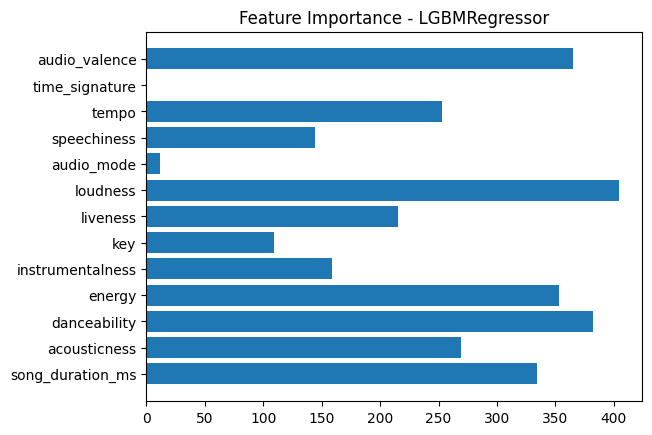

Plotting feature importance for RandomForest...


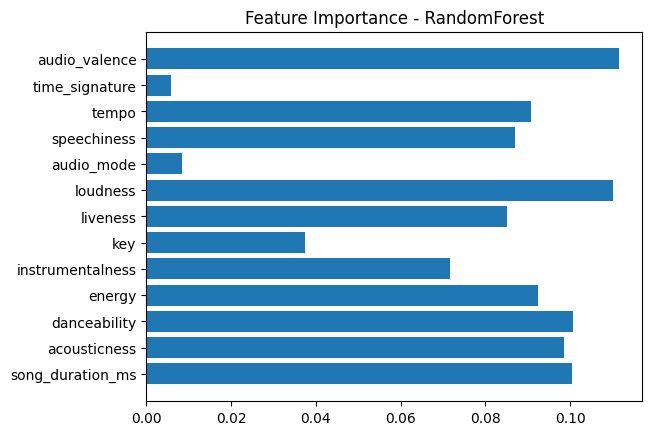

Plotting feature importance for XGBoost...


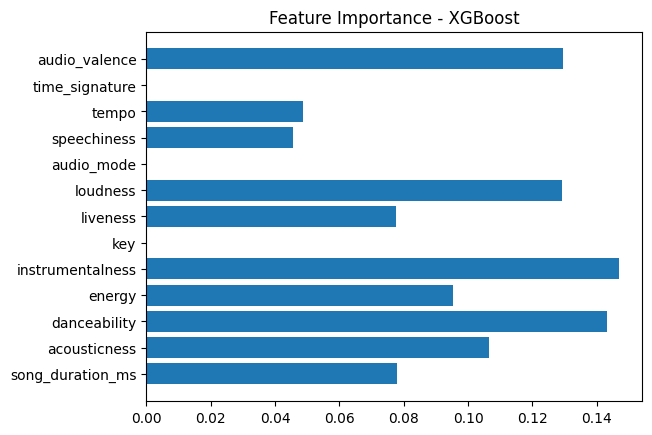

Plotting feature importance for GradientBoostingRegressor...


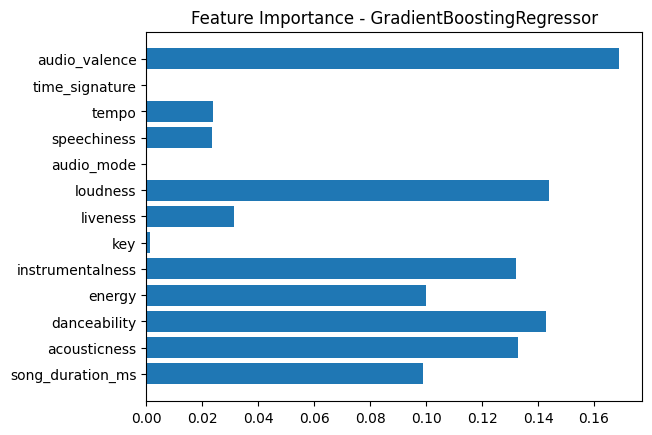

Plotting feature importance for AdaBoostRegressor...


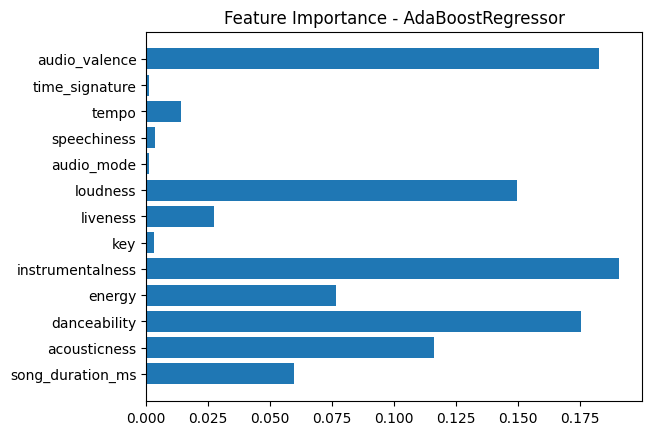

Plotting feature importance for LinearRegression...


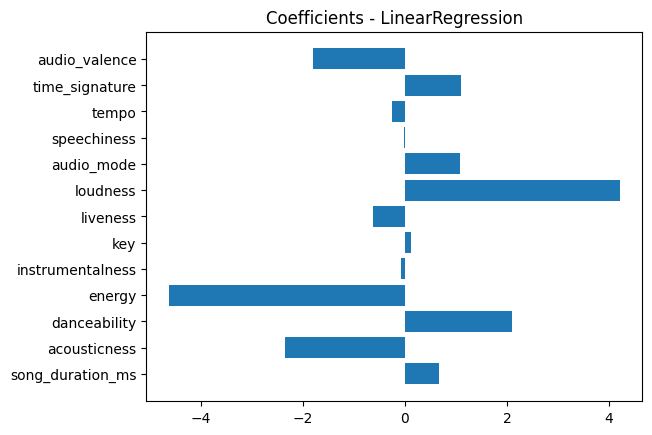

In [ ]:
# Function to plot feature importance or coefficients
def plot_feature_importance(model, model_name, feature_names):
    if hasattr(model, 'feature_importances_'):  # Tree-based models
        importances = model.feature_importances_
        plt.barh(feature_names, importances)
        plt.title(f'Feature Importance - {model_name}')
        plt.show()
    elif hasattr(model, 'coef_'):  # Linear models
        coefficients = model.coef_
        plt.barh(feature_names, coefficients)
        plt.title(f'Coefficients - {model_name}')
        plt.show()

    else:
        print(f'{model_name} does not have feature importance or coefficients.')


feature_names = X_train.columns


for model_name, model in best_models.items():
    print(f'Plotting feature importance for {model_name}...')
    plot_feature_importance(model, model_name, feature_names)

Dari hasil didapatkan hasil feature importance untuk setiap model terlihat cukup normal. Namun dari hasil coefficient linear regression terlihat ada beberapa feature yang cukup ekstreme (loudness, energy). oleh karena itu untuk mengecek indikasi multicollinearity dilakukan pengecekan Vif

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Tambahkan kolom fitur pada X_train jika belum dalam bentuk DataFrame
X_train_df = pd.DataFrame(X_train, columns=feature_names)

# Hitung VIF untuk setiap fitur
vif_data = pd.DataFrame()
vif_data["feature"] = X_train_df.columns
vif_data["VIF"] = [variance_inflation_factor(X_train_df.values, i) for i in range(X_train_df.shape[1])]

print(vif_data)


             feature       VIF
0   song_duration_ms  1.048882
1       acousticness  2.005141
2       danceability  1.394519
3             energy  3.397223
4   instrumentalness  1.087463
5                key  1.016429
6           liveness  1.132684
7           loudness  2.224775
8         audio_mode  1.227337
9        speechiness  1.229106
10             tempo  1.062114
11    time_signature  1.062078
12     audio_valence  1.454674


Hasil Vif terlihat normal (tidak lebih dari 5) sehingga tidak ada masalah multicollinearity, oleh karena itu tidak dilakukan tindakan lebih lanjut untuk masalah linear regresi dan feature.

 Secara keseluruhan kami mendapatkan model dengan performa terbaik adalah random forest dengan hasil R2: 0.0449, MAE: 16.1841, MSE: 414.4264, RMSE: 20.3575. Namun, ini tidak menutup kemungkinan ruang untuk perbaikan, terutama dalam hal pemilihan fitur, tuning model, dan eksplorasi model non-linear untuk menangkap hubungan yang lebih kompleks dalam data. Oleh karena itu feedback dari para mentor sangat dipersilahkan untuk evaluasi yang lebih baik kedepannya.